## UNIVARIATE TIME SERIES ANALYSIS 



### IMPORTING LIBRARIES

In [ ]:
import datetime
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

### IMPORTING DATASET

In [ ]:
#IMPORTING THE DATE COLUMN AS A COLUMN OF DATATYPE 'DATE'
dateparse= lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')
data=pd.read_csv('MAster_methanol.csv',parse_dates=['Date'],date_parser=dateparse,usecols=['Date','India Price'])

<ipython-input-5-4b9dc79be08a>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse= lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')


In [ ]:
data.head()

,Date,India Price
0,2005-10-07,240.0
1,2005-10-14,240.0
2,2005-10-21,242.5
3,2005-10-28,242.5
4,2005-11-04,250.0


In [ ]:
data.dtypes

Date           datetime64[ns]
India Price           float64
dtype: object

### CONVERTING DATE COLUMN TO INDEX

In [ ]:
data.index=pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [ ]:
data.head()

,Date,India Price
Date,,
2005-10-07,2005-10-07,240.0
2005-10-14,2005-10-14,240.0
2005-10-21,2005-10-21,242.5
2005-10-28,2005-10-28,242.5
2005-11-04,2005-11-04,250.0


In [ ]:
data.index

DatetimeIndex(['2005-10-07', '2005-10-14', '2005-10-21', '2005-10-28',
               '2005-11-04', '2005-11-11', '2005-11-18', '2005-11-25',
               '2005-12-02', '2005-12-09',
               ...
               '2021-02-19', '2021-02-26', '2021-03-05', '2021-03-12',
               '2021-03-19', '2021-03-26', '2021-04-02', '2021-04-09',
               '2021-04-16', '2021-04-23'],
              dtype='datetime64[ns]', name='Date', length=796, freq=None)

In [ ]:
del data['Date']

In [ ]:
data

,India Price
Date,
2005-10-07,240.0
2005-10-14,240.0
2005-10-21,242.5
2005-10-28,242.5
2005-11-04,250.0
...,...
2021-03-26,274.0
2021-04-02,274.0
2021-04-09,276.0


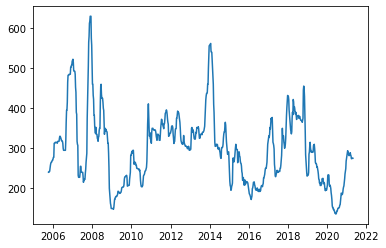

In [ ]:
plt.plot(data.index, data['India Price'] )

### STATIONARITY CHECK

In [ ]:
#CALCULATING THE TRENS,SEASONALITY AND RESIDUALS
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data,period=1)


In [ ]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

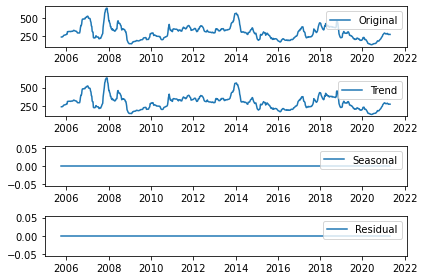

In [ ]:
plt.subplot(411)
plt.plot(data,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()

THE ABOVE ANALYSIS CONCLUDES THAT THE DATA HAS ONLY TREND,NO SEASONALITY

### DICKEY ADFULLER TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adftest=adfuller(data)
print("p-value:",adftest[1])

p-value: 0.00013187182416350931


### SPLITTING DATA INTO TRAIN AND TEST TEST

In [ ]:
 train=data[data.index<pd.to_datetime("01-11-2018",format='%d-%m-%Y')]
 test=data[data.index>pd.to_datetime("01-11-2018",format='%d-%m-%Y')]

In [ ]:
len(train)

670

In [ ]:
train.head()

,India Price
Date,
2005-10-07,240.0
2005-10-14,240.0
2005-10-21,242.5
2005-10-28,242.5
2005-11-04,250.0


In [ ]:
test.head()

,India Price
Date,
2018-11-02,430.0
2018-11-09,390.0
2018-11-16,340.0
2018-11-23,284.0
2018-11-30,267.0


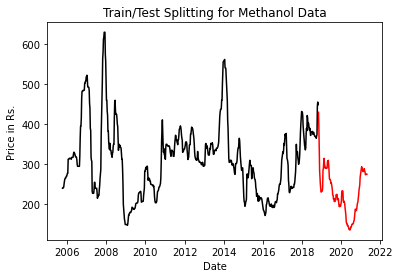

In [ ]:
#PLOTTING TRAIN AND TEST SET
plt.plot(train,color='black')
plt.plot(test,color='red')
plt.xlabel('Date')
plt.ylabel('Price in Rs.')
plt.title('Train/Test Splitting for Methanol Data')
plt.show()

### CALCULATING p,q VALUES FROM ACF AND PACF PLOTS

In [ ]:
#ACF AND PACF PLOTS
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

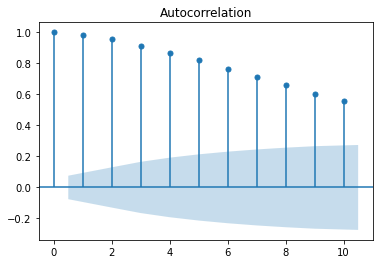

In [ ]:
acf_plot=plot_acf(train,lags=10)  #p=1,2,3,4,5...

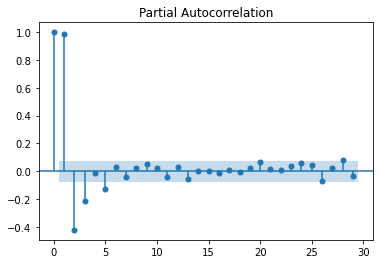

In [ ]:
pacf_plot=plot_pacf(train) #q- 1,2,3,5

The p value from the PACF function is 1

The q value from the ACF function is 1

### ARIMA MODEL (AUTO-REGRESSIVE INTEGRATED MOVING AVERAGE)

In [ ]:
#ARIMA(train,order=(p,d,q))
#d(diffrentiation) is always 0 for ARIMA  as there is no Seasonal Correction
ARIMAmodel = ARIMA(train, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()
#PREDICTING USING ARIMA MODEL
pred_arima=ARIMAmodel.predict(start=len(train),end=(len(data)-1))
pred_arima.index=test.index

C:\Users\Sharon\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sharon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

In [ ]:
pred_arima.head()

Date
2018-11-02    445.934665
2018-11-09    443.231555
2018-11-16    440.584838
2018-11-23    437.993338
2018-11-30    435.455902
dtype: float64

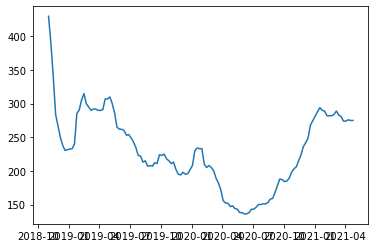

In [ ]:
plt.plot(test)

### CALCULATING RMSE (ROOT MEAN-SQUARE ERROR)

In [ ]:
from sklearn.metrics import mean_squared_error
error_arima=np.sqrt(mean_squared_error(test,pred_arima))
error_arima

141.50164383346285

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
test.mean(),np.sqrt(test.var())

(India Price    229.130952
 dtype: float64,
 India Price    56.932387
 dtype: float64)

In [ ]:
test['India Price']

Date
2018-11-02    430.0
2018-11-09    390.0
2018-11-16    340.0
2018-11-23    284.0
2018-11-30    267.0
              ...  
2021-03-26    274.0
2021-04-02    274.0
2021-04-09    276.0
2021-04-16    275.0
2021-04-23    275.0
Name: India Price, Length: 126, dtype: float64

In [ ]:
df=pd.DataFrame({'Actual Values':test['India Price'],'Forecast Price':pred_arima})

In [ ]:
type(test)

pandas.core.frame.DataFrame

In [ ]:
type(pred_arima)

pandas.core.series.Series

In [ ]:
pred_arima

Date
2018-11-02    445.934326
2018-11-09    443.230781
2018-11-16    440.583640
2018-11-23    437.991725
2018-11-30    435.453885
                 ...    
2021-03-26    326.454018
2021-04-02    326.243150
2021-04-09    326.036681
2021-04-16    325.834519
2021-04-23    325.636576
Length: 126, dtype: float64

In [ ]:
test.head()

,India Price
Date,
2018-11-02,430.0
2018-11-09,390.0
2018-11-16,340.0
2018-11-23,284.0
2018-11-30,267.0


THE DATAFRAME CONSISTING OF ACTUAL PRICE AND PREDICTED VALUES OF INDIA PRICE

In [ ]:
df

,Actual Values,Forecast Price
Date,,
2018-11-02,430.0,445.934665
2018-11-09,390.0,443.231555
2018-11-16,340.0,440.584838
2018-11-23,284.0,437.993338
2018-11-30,267.0,435.455902
...,...,...
2021-03-26,274.0,326.471794
2021-04-02,274.0,326.260950
2021-04-09,276.0,326.054504


ANALYSIS USING GRAPHS

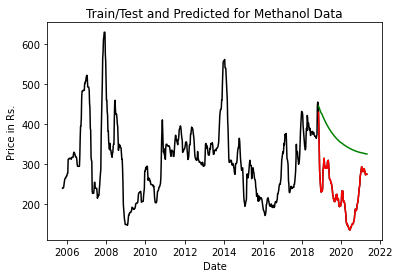

In [ ]:
plt.plot(data,color='black')
plt.plot(test,color='red')
plt.plot(pred_arima,color='green')
plt.xlabel('Date')
plt.ylabel('Price in Rs.')
plt.title('Train/Test and Predicted for Methanol Data')
plt.show()

### ARMA (AUTO-REGRESSIVE MOVING AVERAGE)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
y = train['India Price']

In [ ]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

C:\Users\Sharon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Sharon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [ ]:
#MAKING PREDICTIONS USING ARMA MODEL
ARMAmodel = ARMAmodel.fit()
pred_arma=ARMAmodel.predict(start=len(train),end=(len(data)-1))
pred_arma.index=test.index

C:\Users\Sharon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [ ]:
pred_arma.head()

Date
2018-11-02    447.521137
2018-11-09    446.880308
2018-11-16    446.240396
2018-11-23    445.601400
2018-11-30    444.963320
Name: predicted_mean, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
error_arma=np.sqrt(mean_squared_error(test,pred_arma))
error_arma

188.14597159851192

In [ ]:
#COMPARING THE ACTUAL AND FORECASTED/PREDICTED PRICE
df=pd.DataFrame({'Actual Values':test['India Price'],'Forecast Price':pred_arma})

In [ ]:
df

,Actual Values,Forecast Price
Date,,
2018-11-02,430.0,447.521137
2018-11-09,390.0,446.880308
2018-11-16,340.0,446.240396
2018-11-23,284.0,445.601400
2018-11-30,267.0,444.963320
...,...,...
2021-03-26,274.0,376.279880
2021-04-02,274.0,375.741065
2021-04-09,276.0,375.203021


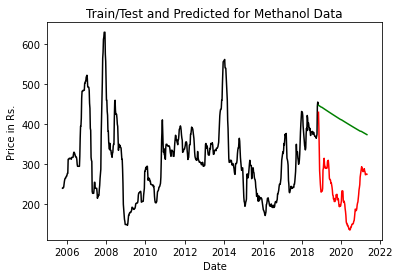

In [ ]:
plt.plot(train,color='black')
plt.plot(test,color='red')
plt.plot(pred_arma,color='green')
plt.xlabel('Date')
plt.ylabel('Price in Rs.')
plt.title('Train/Test and Predicted for Methanol Data')
plt.show()

LET'S CHECK FOR SEASONALITY BEFORE IMPLEMENTING SARIMA MODEL

In [ ]:
rollmean=data.rolling(window=4).mean()
rollstd=data.rolling(window=4).std()

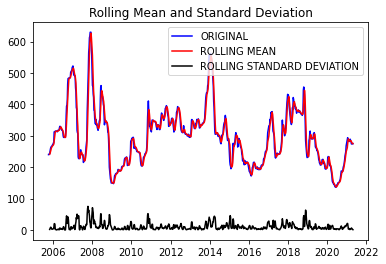

In [ ]:
original=plt.plot(data,color='blue',label='ORIGINAL')
mean=plt.plot(rollmean,color='red',label='ROLLING MEAN')
std=plt.plot(rollstd,color='black',label='ROLLING STANDARD DEVIATION')
plt.legend(loc='best') # LOCATION OF THE LEGEND
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)
    

### SARIMA

In [ ]:
import statsmodels.api as sm
sarima_model=sm.tsa.statespace.SARIMAX(train,order=(1,2,1),seasonal_order=(1,2,1,12),enforce_stationary=True).fit()

C:\Users\Sharon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Sharon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [ ]:
# sarima_model.plot_diagnostics(figsize=(16,10))


In [ ]:
# y_pred = sarima_model.get_forecast(len(test.index))

In [ ]:
#PREDICTING USING SARIMA MODEL
pred_sarima=sarima_model.predict(start=len(train),end=(len(data)-1))
pred_sarima.index=test.index


C:\Users\Sharon\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [ ]:
pred_sarima.head()

Date
2018-11-02    454.711531
2018-11-09    467.045553
2018-11-16    472.931750
2018-11-23    479.791979
2018-11-30    493.730390
Name: predicted_mean, dtype: float64

In [ ]:
df=pd.DataFrame({'Actual Values':test['India Price'],'Forecast Price':pred_sarima})

In [ ]:
df

,Actual Values,Forecast Price
Date,,
2018-11-02,430.0,454.711531
2018-11-09,390.0,467.045553
2018-11-16,340.0,472.931750
2018-11-23,284.0,479.791979
2018-11-30,267.0,493.730390
...,...,...
2021-03-26,274.0,6803.061387
2021-04-02,274.0,6891.831657
2021-04-09,276.0,6983.262059


In [ ]:
from sklearn.metrics import mean_squared_error
error_sarima=np.sqrt(mean_squared_error(test,pred_sarima))
error_sarima

3345.029239861325

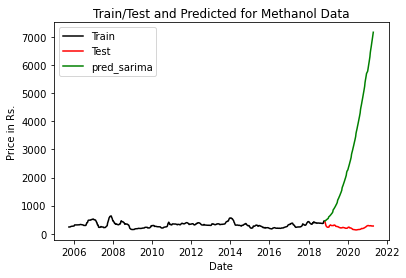

In [ ]:
plt.plot(train,label='Train',color='black')
plt.plot(test,label='Test',color='red')
plt.plot(pred_sarima,label='pred_sarima',color='green')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price in Rs.')
plt.title('Train/Test and Predicted for Methanol Data')
plt.show()

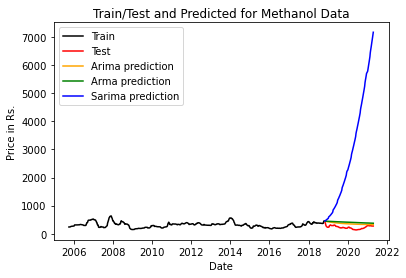

In [ ]:
plt.plot(train,label='Train',color='black')
plt.plot(test,label='Test',color='red')
plt.plot(pred_arima,label='Arima prediction',color='orange')
plt.plot(pred_arma,label='Arma prediction',color='green')
plt.plot(pred_sarima,label='Sarima prediction',color='blue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price in Rs.')
plt.title('Train/Test and Predicted for Methanol Data')
plt.show()

LET US CHECK AS TO WHICH WOULD BE THE BEST MODEL TO FORECAST VALUES OF THE ABOVE DATASET

In [ ]:
print(error_arima)

141.50164383346285


In [ ]:
print(error_arma)

188.14597159851192


In [ ]:
print(error_sarima)

3345.029239861325


ARIMA--->141.4895866965784


ARMA---->188.14862820999238


SARIMA-->3345.029259450346

### FROM THE ABOVE, WE CAN COONCLUDE THE ARIMA WOULD BE A GOOD SUITED MODEL FOR THIS FORECASTING AMONG THE THREE